In [5]:
%load_ext autoreload
%autoreload 2

import shutil
import random
import pandas as pd
import os
import numpy as np
from utils import *
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# create dataset

In [7]:
images = read_json('/Users/molchanov/dev/eye_labelling/json/2023-06-25 19:26:22.767659.json')

In [37]:
len(images)

2925

In [8]:
# Convert the dictionary to a list of key-value pairs
items = list(images.items())

# Shuffle the list
random.shuffle(items)

train_size = int(len(items)*0.7)
# test_size = int(len(items)*0.3)

train_images = dict(items[:train_size])
test_images = dict(items[train_size:])

In [12]:
path_to_ds = '/Users/molchanov/dev/eye_labelling/dataset'
if os.path.exists(path_to_ds) != True:
    os.makedirs(path_to_ds)
lsit_of_types = ['train', 'test']
for tp in lsit_of_types:
    try:
        os.makedirs(f"{path_to_ds}/{tp}/opened")
        os.makedirs(f"{path_to_ds}/{tp}/closed")
    except:
        pass

In [13]:
def copy_files(dir, images):
    source_file = '/Users/molchanov/dev/eye_labelling/EyesDataset'
    path_to_dataset = f'/Users/molchanov/dev/eye_labelling/dataset/{dir}'

    for image, label in images.items():
        src_path = f'{source_file}/{image}'
        if label == 1:
            dst_path = f'{path_to_dataset}/opened/{image}'
        if label == 0:
            dst_path = f'{path_to_dataset}/closed/{image}'
        shutil.copy(src_path, dst_path)

In [14]:
copy_files('train', train_images)
copy_files('test', test_images)

In [20]:
images

{'000000.jpg': 1,
 '000001.jpg': 1,
 '000003.jpg': 0,
 '000004.jpg': 0,
 '000005.jpg': 0,
 '000006.jpg': 1,
 '000007.jpg': 0,
 '000008.jpg': 1,
 '000009.jpg': 1,
 '000010.jpg': 1,
 '000011.jpg': 1,
 '000014.jpg': 1,
 '000015.jpg': 0,
 '000018.jpg': 1,
 '000019.jpg': 0,
 '000020.jpg': 1,
 '000022.jpg': 0,
 '000023.jpg': 1,
 '000024.jpg': 1,
 '000025.jpg': 0,
 '000027.jpg': 1,
 '000029.jpg': 1,
 '000030.jpg': 1,
 '000031.jpg': 1,
 '000033.jpg': 1,
 '000034.jpg': 1,
 '000036.jpg': 0,
 '000037.jpg': 0,
 '000038.jpg': 0,
 '000039.jpg': 0,
 '000040.jpg': 1,
 '000041.jpg': 0,
 '000042.jpg': 1,
 '000044.jpg': 1,
 '000045.jpg': 0,
 '000047.jpg': 0,
 '000048.jpg': 0,
 '000049.jpg': 0,
 '000050.jpg': 0,
 '000051.jpg': 1,
 '000052.jpg': 1,
 '000053.jpg': 0,
 '000055.jpg': 0,
 '000056.jpg': 0,
 '000057.jpg': 0,
 '000058.jpg': 1,
 '000059.jpg': 1,
 '000060.jpg': 0,
 '000061.jpg': 1,
 '000062.jpg': 0,
 '000063.jpg': 1,
 '000066.jpg': 1,
 '000067.jpg': 0,
 '000068.jpg': 0,
 '000069.jpg': 0,
 '000070.j

# create_dataframes

In [21]:
abs_path = '/Users/molchanov/dev/eye_labelling/EyesDataset'
dict_images = {}
dict_images['image'] = []
dict_images['label'] = []
for image, label in images.items():
    dict_images['image'].append(f'{abs_path}/{image}')
    dict_images['label'].append(label)


df = pd.DataFrame(dict_images)
df.head()

,image,label
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,1
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,1
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,0


# unlabeled_images

In [34]:
path_to_all_images = '/Users/molchanov/dev/eye_labelling/EyesDataset'
all_images = sorted([im for im in os.listdir(path_to_all_images) if '.jpg' in im])
labeled_images = list(images.keys())
unlabeled_images = sorted(list(set(all_images)-set(labeled_images)))

In [36]:
unlabeled_images = [f'{abs_path}/{im}' for im in unlabeled_images]
unlabeled_images

['/Users/molchanov/dev/eye_labelling/EyesDataset/000002.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000012.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000013.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000016.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000017.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000021.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000026.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000028.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000032.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000035.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000043.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000046.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000054.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000064.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000065.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000076.jpg',
 '/Users

# Comparing of datasets

In [15]:
import os
import numpy as np
import cv2 as cv
from utils import *
from tqdm import tqdm
from matplotlib import pyplot as plt
from skimage.metrics import mean_squared_error as mse

In [16]:
path = '/Users/molchanov/dev/eye_labelling/dataset_B_Eye_Images'
folders = [dr for dr in os.listdir(path) if 'DS' not in dr]

dataset_B = [] # image.replace('.', '_', 1)
for folder in folders:
    temp_list = [f"{path}/{folder}/{image}" for image in os.listdir(f"{path}/{folder}") if '.jpg' in image]
    dataset_B.extend(temp_list)

In [17]:
path_to_main_dataset = '/Users/molchanov/dev/eye_labelling/EyesDataset'
main_images = [f"{path_to_main_dataset}/{im}" for im in os.listdir(path_to_main_dataset) if '.jpg' in im]

In [19]:
sorted(main_images)

['/Users/molchanov/dev/eye_labelling/EyesDataset/000000.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000001.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000002.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000003.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000004.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000005.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000006.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000007.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000008.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000009.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000010.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000011.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000012.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000013.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000014.jpg',
 '/Users/molchanov/dev/eye_labelling/EyesDataset/000015.jpg',
 '/Users

In [54]:
dc = {}

for main_image in tqdm(main_images):
    im1 = cv.imread(main_image)
    for image in dataset_B:
        im2 = cv.imread(image)
        if mse(im1, im2) == 0.0:
            dc[main_image] = image
            break

100%|██████████| 4000/4000 [05:21<00:00, 12.43it/s]


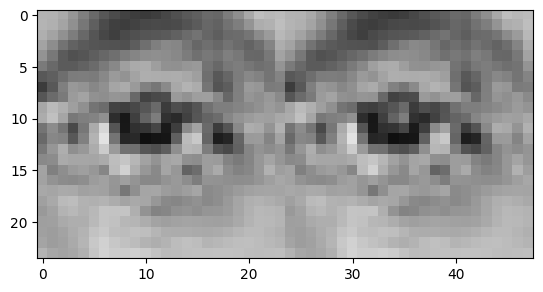

In [64]:
index = 1000
im1 = cv.imread(list(dc.keys())[index])
im2 = cv.imread(list(dc.values())[index])
plt.imshow(np.concatenate([im1, im2], axis=1))

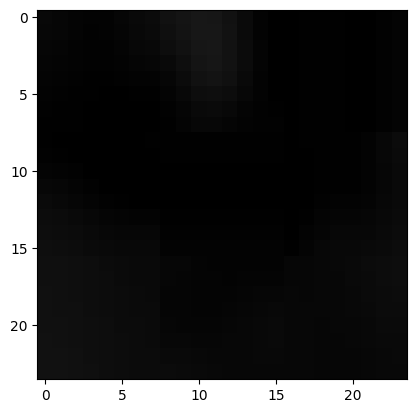

In [39]:
plt.imshow(cv.imread("/Users/molchanov/dev/eye_labelling/dataset_B_Eye_Images/closedRightEyes/closed_eye_0464.jpg_face_1_R.jpg"))

In [69]:
dc_new = {k: dc[k] for k in sorted(list(dc.keys()))}
save_json(dc_new)

# sync two df

In [78]:
df

,image,label
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,1
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,1
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
...,...,...
2920,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
2921,/Users/molchanov/dev/eye_labelling/EyesDataset...,1
2922,/Users/molchanov/dev/eye_labelling/EyesDataset...,0
2923,/Users/molchanov/dev/eye_labelling/EyesDataset...,1


In [83]:
dc_main = read_json('/Users/molchanov/dev/eye_labelling/json/2023-06-28 09:07:15.004640.json')

dc_main_new = {}
dc_main_new['image'] = []
dc_main_new['gt_path'] = []
for key, value in dc_main.items():
    dc_main_new['image'].append(key)
    dc_main_new['gt_path'].append(value)


main_df = pd.DataFrame(dc_main_new)
main_df

,image,gt_path
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
...,...,...
3995,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3996,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3997,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3998,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...


In [84]:
main_df

,image,gt_path
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
...,...,...
3995,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3996,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3997,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...
3998,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...


In [100]:
main_df['gt_label'] = main_df['gt_path'].str.contains('open')
main_df['gt_label'] = main_df['gt_label'].astype(int)

In [101]:
main_df

,image,gt_path,gt_label
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
...,...,...,...
3995,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
3996,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
3997,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
3998,/Users/molchanov/dev/eye_labelling/EyesDataset...,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1


In [118]:
df.merge(main_df, how='inner', on='image')

,image,label,gt_path,gt_label


In [120]:
df.loc[0, 'image']

"/Users/molchanov/dev/eye_labelling/EyesDataset/{'000000.jpg': 1, '000001.jpg': 1, '000003.jpg': 0, '000004.jpg': 0, '000005.jpg': 0, '000006.jpg': 1, '000007.jpg': 0, '000008.jpg': 1, '000009.jpg': 1, '000010.jpg': 1, '000011.jpg': 1, '000014.jpg': 1, '000015.jpg': 0, '000018.jpg': 1, '000019.jpg': 0, '000020.jpg': 1, '000022.jpg': 0, '000023.jpg': 1, '000024.jpg': 1, '000025.jpg': 0, '000027.jpg': 1, '000029.jpg': 1, '000030.jpg': 1, '000031.jpg': 1, '000033.jpg': 1, '000034.jpg': 1, '000036.jpg': 0, '000037.jpg': 0, '000038.jpg': 0, '000039.jpg': 0, '000040.jpg': 1, '000041.jpg': 0, '000042.jpg': 1, '000044.jpg': 1, '000045.jpg': 0, '000047.jpg': 0, '000048.jpg': 0, '000049.jpg': 0, '000050.jpg': 0, '000051.jpg': 1, '000052.jpg': 1, '000053.jpg': 0, '000055.jpg': 0, '000056.jpg': 0, '000057.jpg': 0, '000058.jpg': 1, '000059.jpg': 1, '000060.jpg': 0, '000061.jpg': 1, '000062.jpg': 0, '000063.jpg': 1, '000066.jpg': 1, '000067.jpg': 0, '000068.jpg': 0, '000069.jpg': 0, '000070.jpg': 1,

In [122]:
joined_df = df.join(main_df.set_index('image'), on='image', how='left')
joined_df

,image,label,gt_path,gt_label
0,/Users/molchanov/dev/eye_labelling/EyesDataset...,1,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
1,/Users/molchanov/dev/eye_labelling/EyesDataset...,1,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
2,/Users/molchanov/dev/eye_labelling/EyesDataset...,0,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
3,/Users/molchanov/dev/eye_labelling/EyesDataset...,0,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
4,/Users/molchanov/dev/eye_labelling/EyesDataset...,0,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
...,...,...,...,...
2920,/Users/molchanov/dev/eye_labelling/EyesDataset...,0,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
2921,/Users/molchanov/dev/eye_labelling/EyesDataset...,1,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1
2922,/Users/molchanov/dev/eye_labelling/EyesDataset...,0,/Users/molchanov/dev/eye_labelling/dataset_B_E...,0
2923,/Users/molchanov/dev/eye_labelling/EyesDataset...,1,/Users/molchanov/dev/eye_labelling/dataset_B_E...,1


In [127]:
# Размечены мной
joined_df['label'].value_counts()

label
0    1531
1    1394
Name: count, dtype: int64

In [128]:
# Ground truth
joined_df['gt_label'].value_counts()

gt_label
0    1486
1    1439
Name: count, dtype: int64